# PCA and Correlation of the reduced list of hardware performance counters

Load database

In [1]:
library("factoextra")
path="C:/Users/Jordi/Desktop/Jupyter/Paper/"
setwd(path)
mydata = read.csv("data.csv", sep=";")

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Remove unnecessary columns and remove discard hardware performance counters selected with PCA and correlation analysis

In [2]:
new_mydata = mydata[,5:61]
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_NTK))
new_mydata <- subset(new_mydata, select = -c(PAPI_BR_PRC))
new_mydata <- subset(new_mydata, select = -c(PAPI_FP_INS))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L1_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCH))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L2_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_DCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_ICR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_LDM))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCA))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCR))
new_mydata <- subset(new_mydata, select = -c(PAPI_L3_TCW))
new_mydata <- subset(new_mydata, select = -c(PAPI_RES_STL))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_DM))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_IM))
new_mydata <- subset(new_mydata, select = -c(PAPI_TLB_TL))
new_mydata <- subset(new_mydata, select = -c(PAPI_TOT_CYC))
new_mydata <- subset(new_mydata, select = -c(PAPI_TOT_IIS))

#Removed due to being 0, rows where all are 0's give errors in corrplot
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_DP))
new_mydata <- subset(new_mydata, select = -c(PAPI_SP_OPS))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_SP))

dim(new_mydata)


[1] 448000     17

Normalize data, separate labels and execute PCA

In [3]:
escaled_data <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata[,4]
res.pca <- prcomp(escaled_data, center = TRUE, scale. = TRUE)
summary(res.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.7468 1.25104 0.85860 0.71272 0.33528 0.15292 0.10686
Proportion of Variance 0.8258 0.09207 0.04336 0.02988 0.00661 0.00138 0.00067
Cumulative Proportion  0.8258 0.91788 0.96124 0.99112 0.99773 0.99911 0.99978
                           PC8     PC9    PC10     PC11     PC12     PC13
Standard deviation     0.04778 0.03507 0.01170 0.006701 0.003857 0.002701
Proportion of Variance 0.00013 0.00007 0.00001 0.000000 0.000000 0.000000
Cumulative Proportion  0.99992 0.99999 1.00000 1.000000 1.000000 1.000000
                           PC14     PC15      PC16      PC17
Standard deviation     0.002542 0.001397 0.0008523 2.618e-14
Proportion of Variance 0.000000 0.000000 0.0000000 0.000e+00
Cumulative Proportion  1.000000 1.000000 1.0000000 1.000e+00

Calculate variance

In [4]:
eig <- (res.pca$sdev)^2
variance <- eig*100/sum(eig)
dfvariance <- data.frame(variance)

Show variance in each PCA

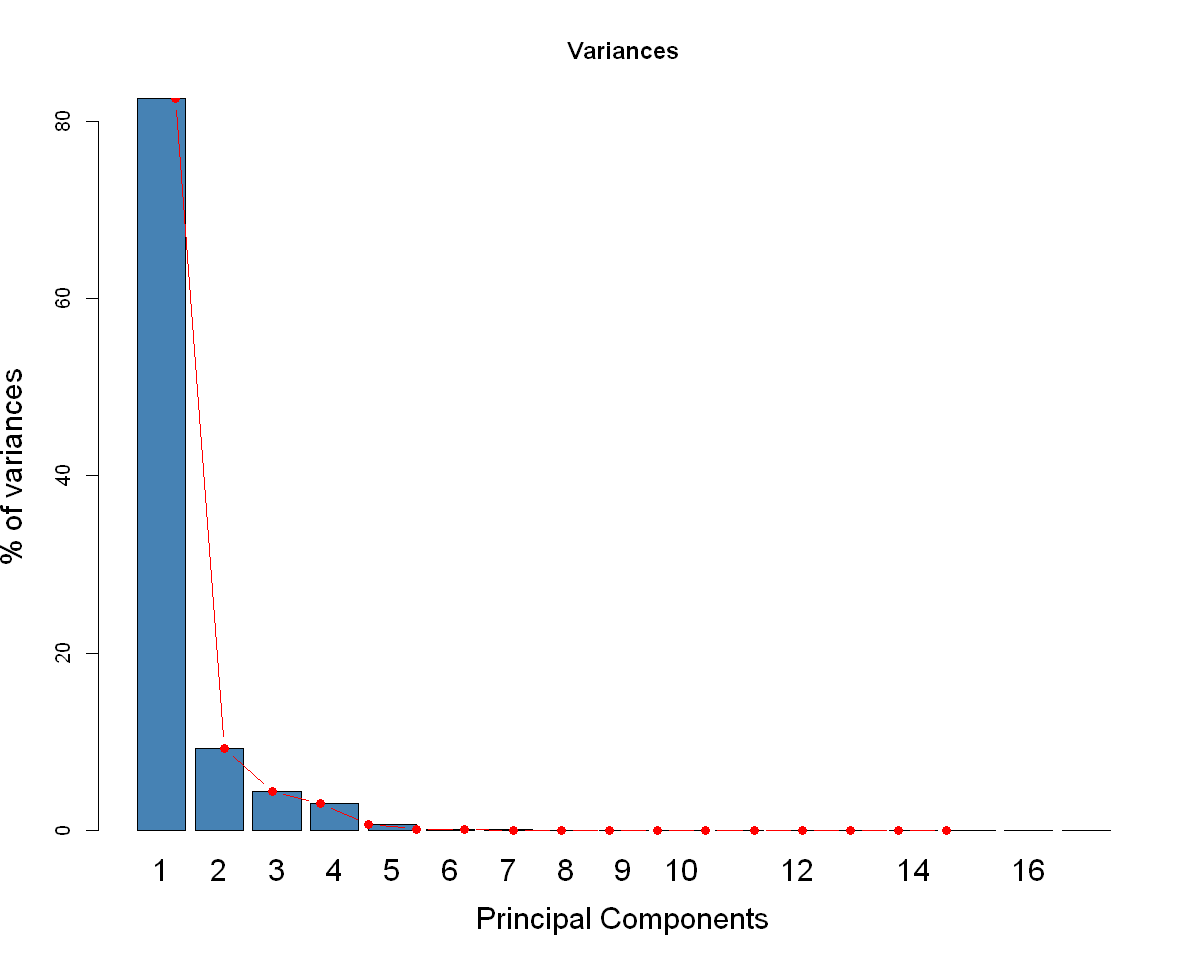

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
barplot(dfvariance[, 1], names.arg=1:nrow(dfvariance), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "% of variances",
       col ="steelblue",
       cex.names=1.5,
       cex.lab=1.5)
# Add connected line segments to the plot
lines(x = 1:nrow(dfvariance), 
      dfvariance[, 1], 
      type="b", pch=19, col = "red")

Show PCA graph

Loading required package: usethis
Loading required package: plyr
Loading required package: scales
Loading required package: grid


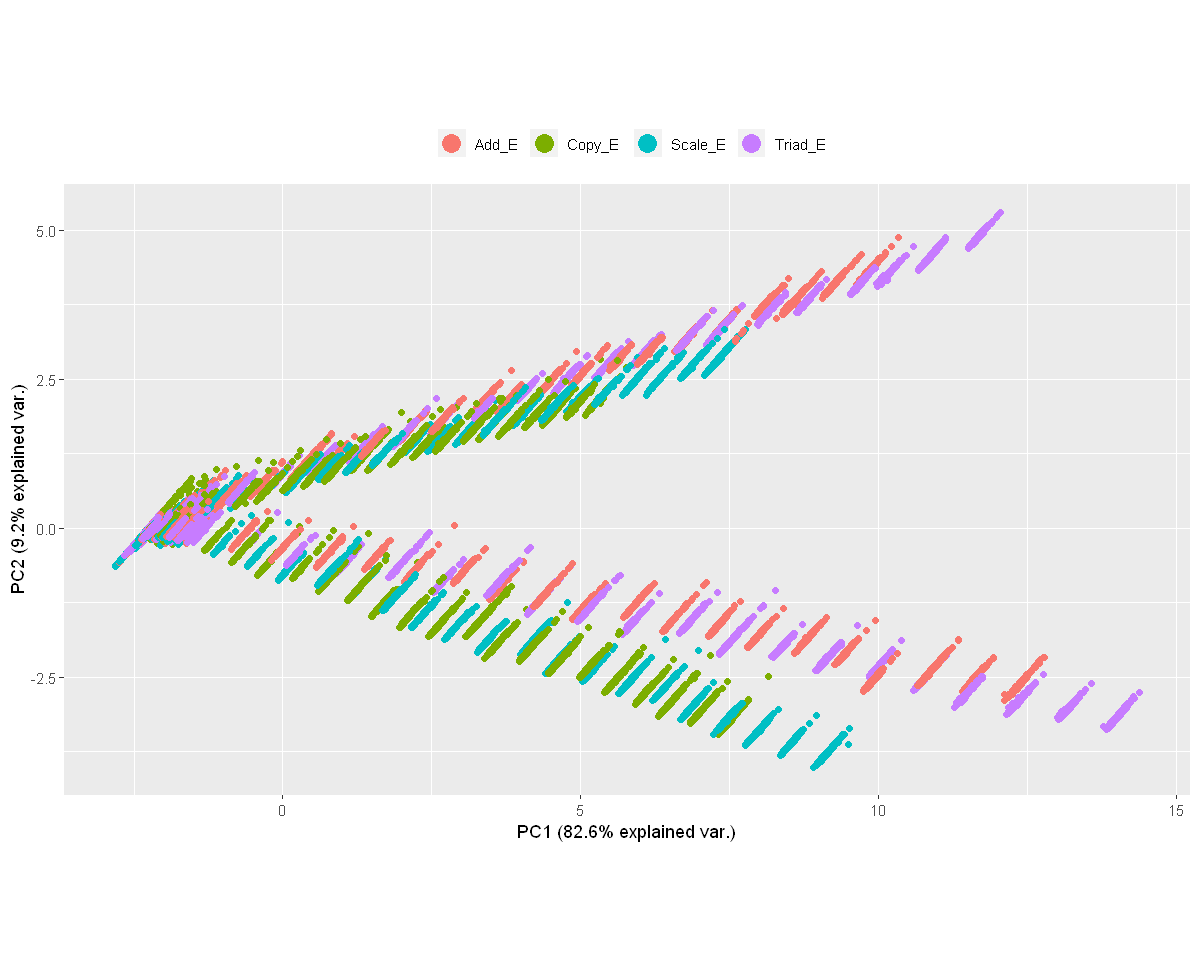

In [6]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
g <- g + guides(color = guide_legend(override.aes = list(size=5)))
print(g)

Load data without without normalizing to calculate correlation

In [7]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_NTK))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_LDM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_TL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_IIS))

#Removed due to being 0, rows where all are 0's give errors in corrplot
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_SP_OPS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)

Show Correlation Analysis matrix

corrplot 0.84 loaded


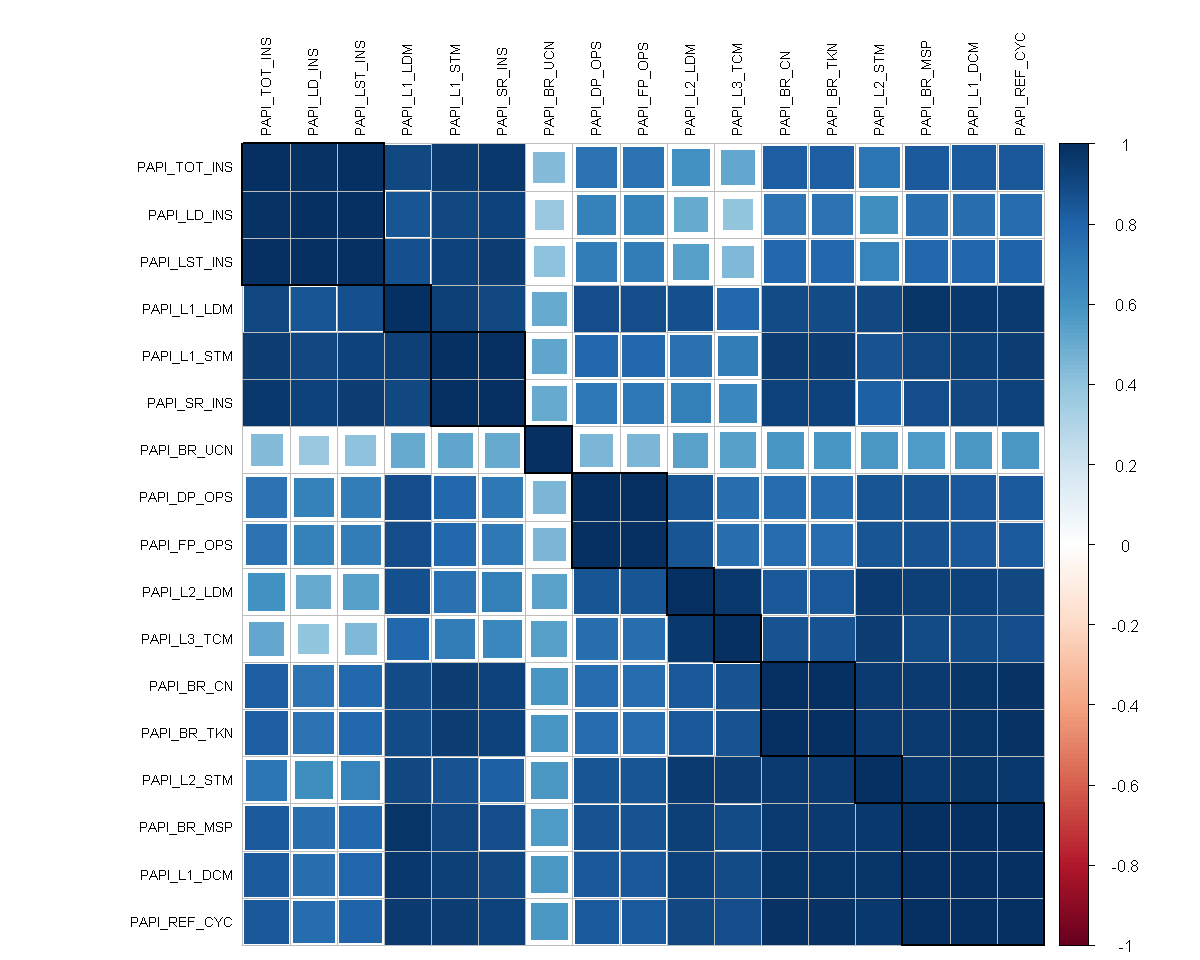

In [8]:
library(corrplot)
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

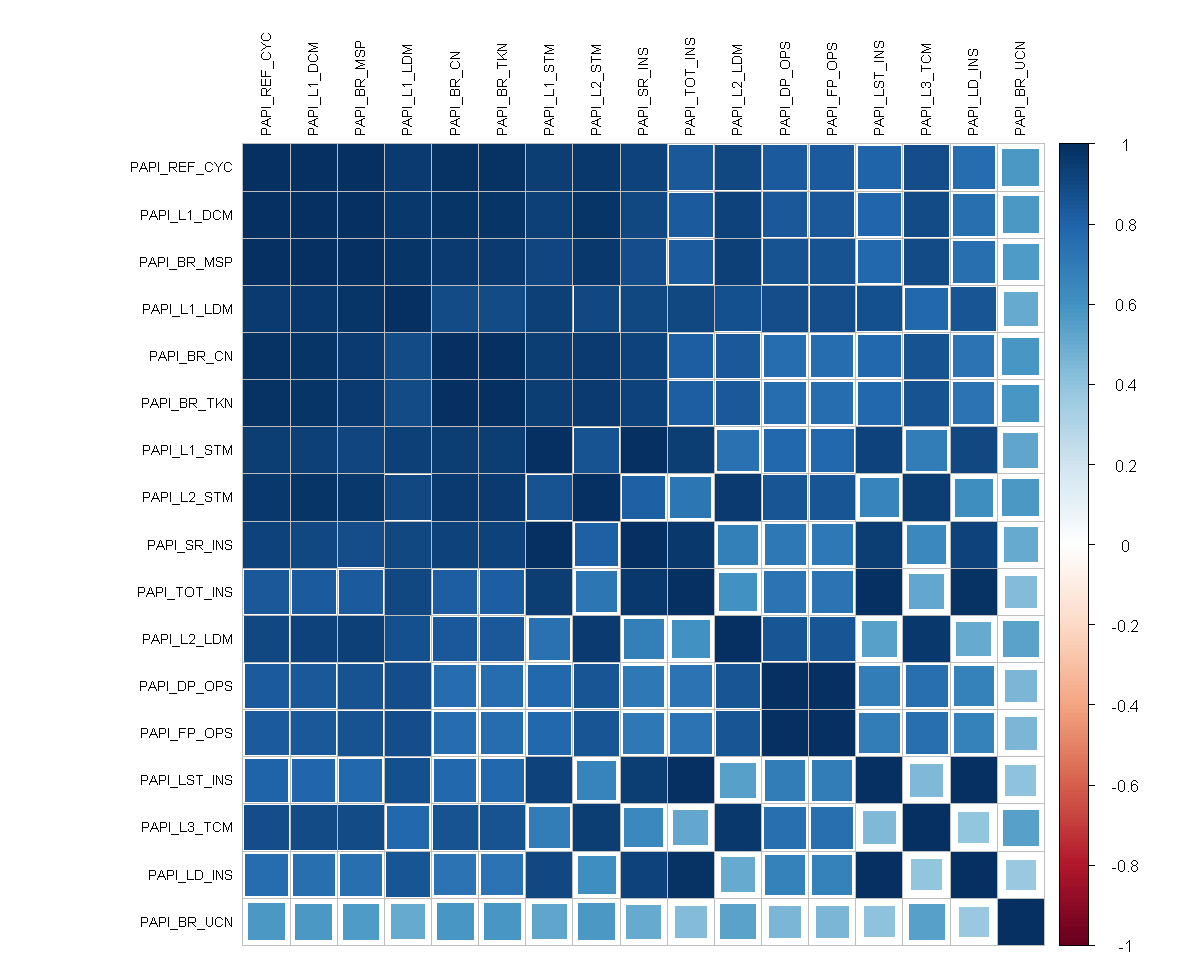

In [9]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

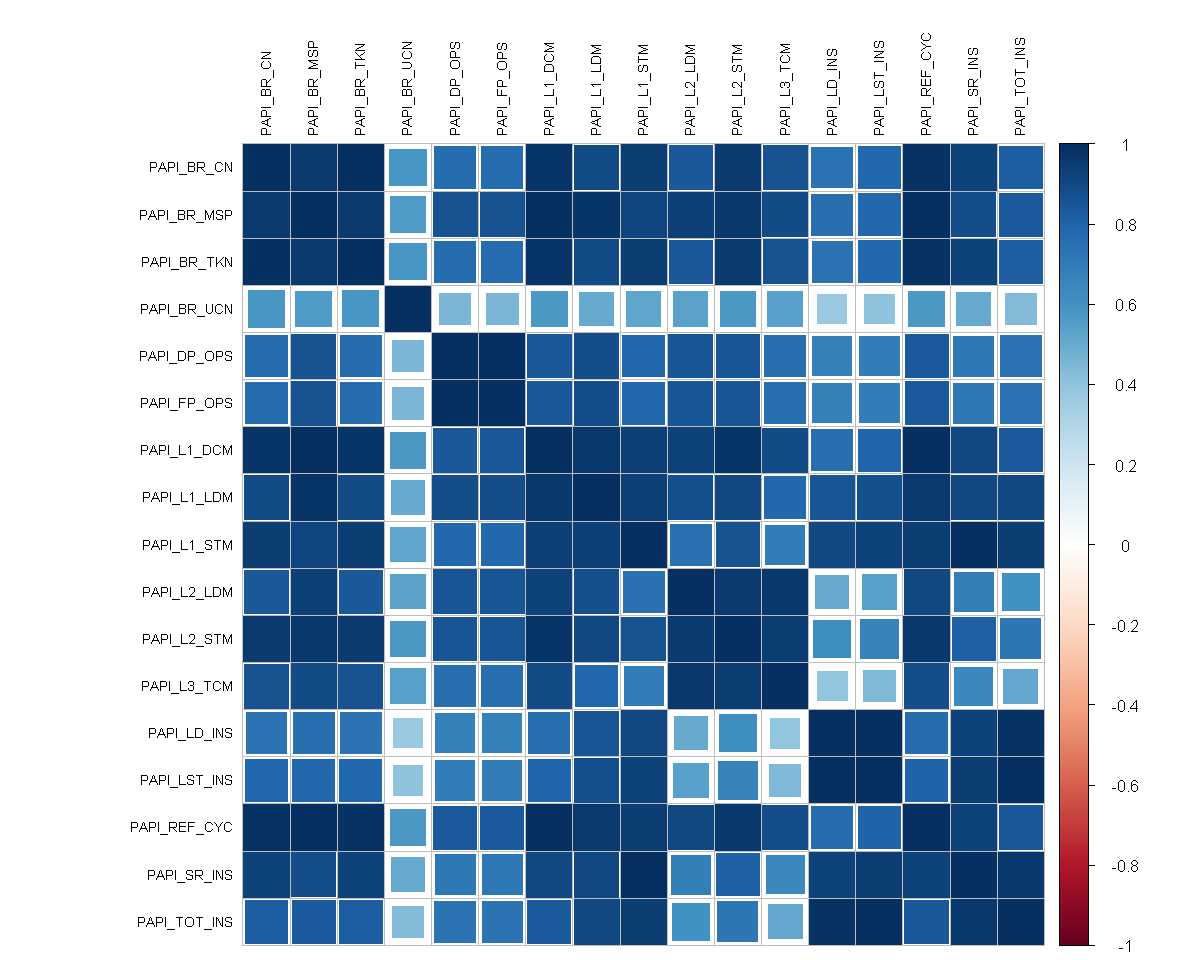

In [10]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)